In [1]:
""" This script uses both the gml_annual_means and utils from ozoneassessment2026 
    both repositories should be cloned in the same parent directory.
    
    ozoneassessment2026.utils loads both agage and noaa data. Though the noaa
    data is pulled from the gml_annual_means directory.
    
    The script makes Figure 1.1 of the WMO Ozone Assessment 2026.
    Original figure code from Lei Hu from 2022.
"""

import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path

here = Path.cwd()
gml_path = here / 'gml_annual_means' / 'GML_annual_means.csv'
gml_data = pd.read_csv(gml_path, index_col=0, comment='#')

# Add the parent directory of ozoneassessment2026 to sys.path
# load both agage and noaa data using utils
base_path = here.parent / 'ozoneassessment2026'
sys.path.append(str(base_path))
from utils import utils   # Import utils from ozoneassessment2026

# set the path for noaa data (overrides utils.noaa_mf_dir)
utils.noaa_mf_dir = here / 'gml_annual_means' / 'data_files'

figure_path = here / 'gml_annual_means' / 'figures'

In [2]:
gml_data.tail()

,CFC11,CFC12,CFC113,CH3CCl3,CCl4,C2Cl4,CH2Cl2,HCFC22,HCFC141b,HCFC142b,...,CH3Br,CH3Cl,HFC32,HFC125,HFC134a,HFC143a,HFC152a,HFC227ea,HFC365mfc,HFC236fa
year,,,,,,,,,,,,,,,,,,,,,
2020.5,223.993,497.225,68.962,1.423,77.041,1.129,45.241,248.144,24.571,21.721,...,6.687,553.952,22.109,32.293,113.488,25.308,7.363,1.706,1.027,0.199
2021.5,221.732,493.288,68.363,1.257,75.812,1.143,50.123,249.027,24.654,21.517,...,6.633,551.719,25.411,35.627,119.178,26.998,7.506,1.875,1.054,0.212
2022.5,219.527,489.637,67.808,1.114,74.758,1.073,49.401,248.913,24.658,21.244,...,6.546,549.723,29.369,39.567,124.664,28.967,7.626,2.044,1.074,0.225
2023.5,217.157,485.432,67.225,1.016,73.838,1.021,52.128,247.693,24.580,20.994,...,6.499,548.025,33.784,43.475,129.729,30.671,7.603,2.208,1.073,0.237
2024.5,214.518,481.469,66.612,0.878,73.041,1.114,57.374,245.490,24.489,20.760,...,6.559,554.294,38.150,47.454,134.900,32.411,8.037,2.396,1.036,0.246


In [3]:
gas = 'CFC-11'
date_a, data_a, data_a_sd = utils.get_global_mf(gas, "agage")
date_n, data_n, data_n_sd = utils.get_global_mf(gas, "noaa")
date_n += 0.5  # shift NOAA data by 0.5 years to match AGAGE

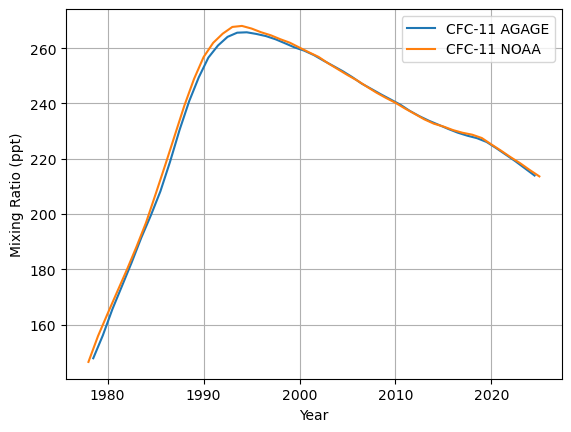

In [4]:
plt.plot(date_a, data_a, label=f'{gas} AGAGE')
plt.plot(date_n, data_n, label=f'{gas} NOAA')
#plt.plot(gml_data.index, gml_data[gas.replace('-','')], label=f'{gas} NOAA2')
plt.xlabel('Year')
plt.ylabel('Mixing Ratio (ppt)')
plt.legend()
plt.grid()
plt.show()

# Figure 1.1 code below

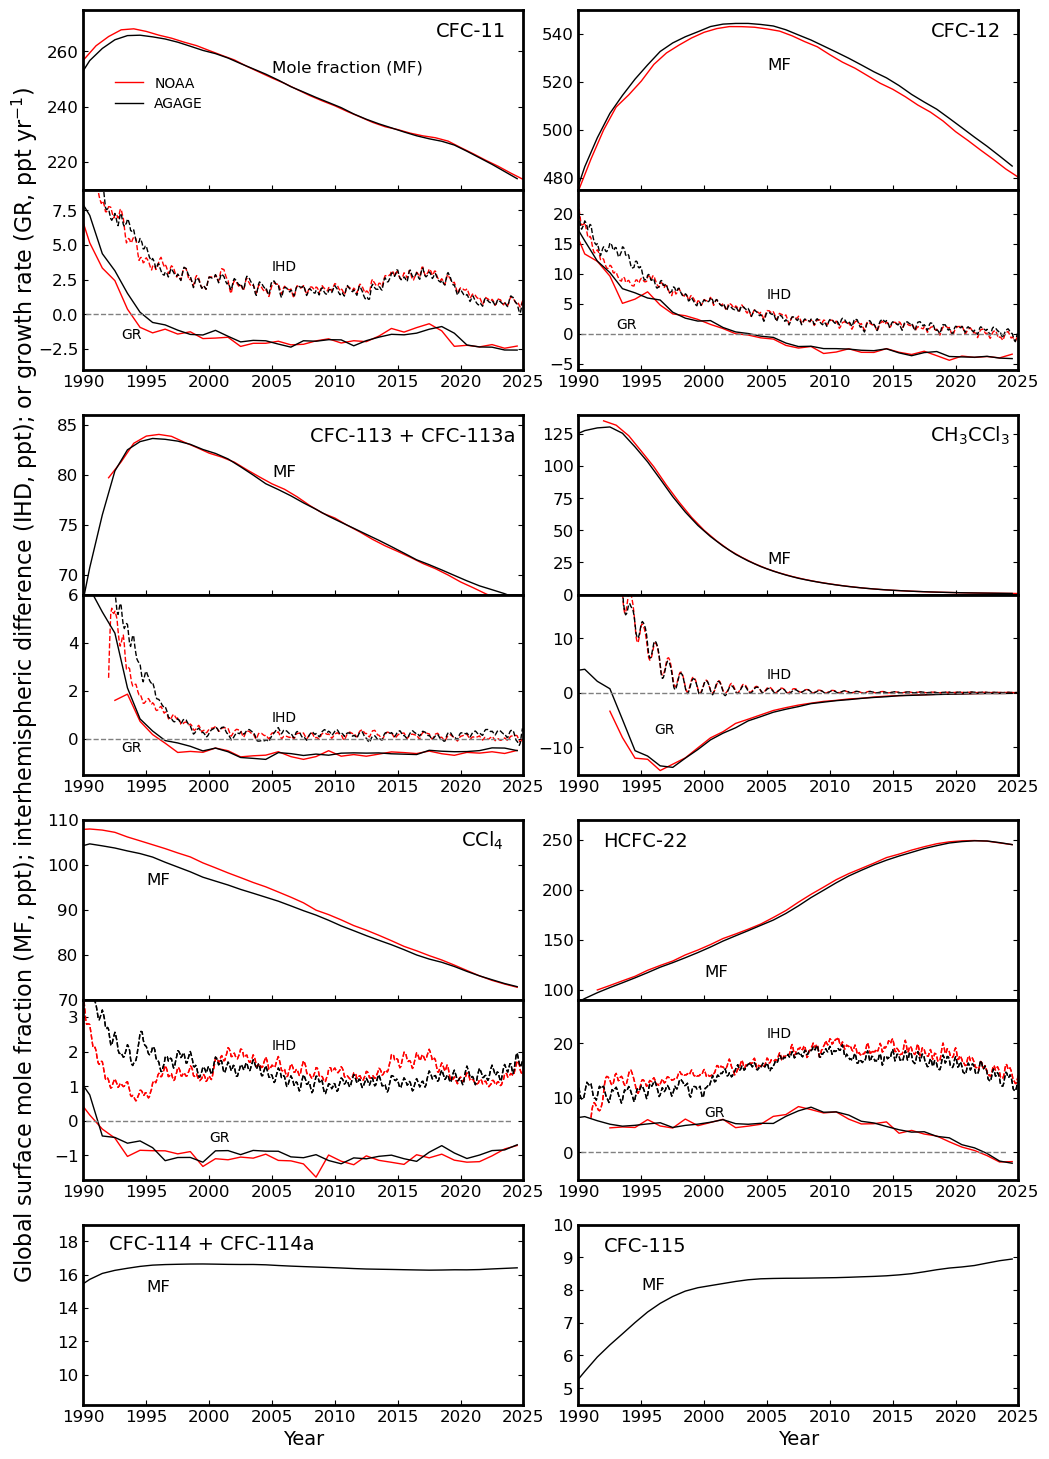

In [12]:
gases = ['CFC-11', 'CFC-12', 'CFC-113', 'CH3CCl3']

fig = plt.figure(figsize=(11,18))
positions = [[0.13, 0.875, 0.4, 0.1],[0.13, 0.775, 0.4, 0.1], [0.58, 0.875, 0.4, 0.1],[0.58, 0.775, 0.4, 0.1],
             [0.13, 0.65, 0.4, 0.1],[0.13, 0.55, 0.4, 0.1], [0.58, 0.65, 0.4, 0.1],[0.58, 0.55, 0.4, 0.1],
             [0.13, 0.425, 0.4, 0.1],[0.13, 0.325, 0.4, 0.1], [0.58, 0.425, 0.4, 0.1],[0.58, 0.325, 0.4, 0.1],
             [0.13, 0.2, 0.4, 0.1],[0.13, 0.1, 0.4, 0.1], [0.58, 0.2, 0.4, 0.1],[0.58, 0.1, 0.4, 0.1]]

for g, gas in enumerate(gases):

    date_n, data_n, data_n_sd = utils.get_global_mf(gas, "noaa")
    date_n_hem, data_n_nh, data_n_sh = utils.get_hemispheric_mf(gas, "noaa")
    date_a, data_a, data_a_sd = utils.get_global_mf(gas, "agage")
    date_a_hem, data_a_nh, data_a_sh = utils.get_hemispheric_mf(gas, "agage")

    if g==0:
        yranges=[[210,275],[-4,9]]
        txt0 ='Mole fraction (MF)'
    elif g == 1:
        yranges=[[475,550],[-6,24]]
        txt0 ='MF'
    elif g == 2:
        yranges=[[68, 86],[-1.5,6]]
    elif g == 3:
        yranges=[[0, 140],[-15,18]]
    
    # upper panel figure
    ax=fig.add_axes(positions[g*2])
    ax.plot(date_n+0.5, data_n,'r-', linewidth=1, label='NOAA')
    ax.plot(date_a, data_a,'k-', linewidth=1, label='AGAGE')
    ax.set_xticklabels([])
    plt.yticks(fontsize=12)
    ax.set_xlim([1990,2025])
    ax.set_ylim([yranges[0][0], yranges[0][1]])
    if g== 1:
        ax.text(2005, 525, txt0, fontsize=12)
    else:
        ax.text(2005, data_n[int(2004-date_n[0])], txt0, fontsize=12)
        
    # gas name labels
    ytxt = (yranges[0][1] - yranges[0][0])*0.85 + yranges[0][0]
    if g == 3:
        ax.text(2018, ytxt, r'CH${_3}$CCl${_3}$', fontsize=14)
    elif g == 2:
        ax.text(2008, ytxt, 'CFC-113 + CFC-113a', fontsize=14)
    else:
        ax.text(2018, ytxt, gas, fontsize=14)
        
    ax.tick_params(axis='both', direction='in', which='both', bottom=True, top=False, left=True, right=True,
                    labelbottom=False, labeltop=False, labelleft=True, labelright=False)
    if g == 0:
        ax.legend(bbox_to_anchor=[0.30,0.7], edgecolor='w')
        
    # lower panel figure
    ax=fig.add_axes(positions[g*2+1])
    # interhemispheric gradient
    ihd_n = data_n_nh-data_n_sh
    ihd_a = data_a_nh-data_a_sh
    ax.plot(date_n_hem, ihd_n,'r--', linewidth=1)
    ax.plot(date_a_hem, ihd_a,'k--', linewidth=1)
   
    # global growth rate
    gr = data_n[1:] - data_n[:-1]
    ax.plot(date_n[1:], gr, 'r-', linewidth=1)
    gr_agage = data_a[1:] - data_a[:-1]
    ax.plot(date_a[1:], gr_agage, 'k-', linewidth=1)

    # ihd labels
    ax.plot(range(1989,2025), np.arange(1989,2025)*0, '--', color='gray', linewidth=1)
    idx = np.searchsorted(date_n_hem, 2005)
    ihd_text_scale = 1.5 if g < 2 else 3
    ax.text(date_n_hem[idx], ihd_n[idx]*ihd_text_scale,'IHD')

    # gr labels
    idx = np.searchsorted(date_n, 2000)
    if g == 3:
        ax.text(1996, gr[idx]*1.05, 'GR')
    else:
        ax.text(1993, gr[idx]*1.05, 'GR')
    
    ax.set_xlim([1990,2025])
    ax.set_ylim([yranges[1][0], yranges[1][1]])
    ax.tick_params(axis='both', direction='in', which='both', bottom=True, top=False, left=True, right=True,
                   labelbottom=True, labeltop=False, labelleft=True, labelright=False)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    if g == 2:
        plt.ylabel(r'Global surface mole fraction (MF, ppt); interhemispheric difference (IHD, ppt); or growth rate (GR, ppt yr$^{-1}$)', 
                   fontsize=16, labelpad=20)
        
#  ------------------------------------------------
gases = ['CCl4','HCFC-22','CFC-114', 'CFC-115']

for g, gas in enumerate(gases):

    # load data
    date_n, data_n, data_n_sd = utils.get_global_mf(gas, "noaa")
    date_n_hem, data_n_nh, data_n_sh = utils.get_hemispheric_mf(gas, "noaa")
    date_a, data_a, data_a_sd = utils.get_global_mf(gas, "agage")
    date_a_hem, data_a_nh, data_a_sh = utils.get_hemispheric_mf(gas, "agage")

    #print(g*2+8, g*2+9, positions[g*2+8], positions[g*2+9])
    if g==0:
        yranges=[[70,110],[-1.7,3.5]]
    elif g == 1:
        yranges=[[90,270],[-5, 28]]
    elif g == 2:
        yranges=[[8.2,19],[0, 28]]
    elif g == 3:
        yranges=[[4.5,10],[0, 28]]
   
    ytxt = (yranges[0][1] - yranges[0][0])*0.85 + yranges[0][0]
   
    # upper panel figure
    ax = fig.add_axes(positions[g*2+8])
    if date_n is not None:
        ax.plot(date_n, data_n, 'r-', linewidth=1, label='NOAA')
        #ax.text(2005, data_n[int(2000-date_n[0])], txt0, fontsize=14)
        ax.set_xticklabels([])
    if date_a is not None:
        ax.plot(date_a, data_a, 'k-', linewidth=1, label='AGAGE')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax.set_xlim([1990, 2025])
    ax.set_ylim([yranges[0][0], yranges[0][1]])
    if g<2:
        ax.tick_params(axis='both', direction='in', which='both', bottom=True, top=False, left=True, right=True,
                   labelbottom=False, labeltop=False, labelleft=True, labelright=False)
    else:
        ax.tick_params(axis='both', direction='in', which='both', bottom=True, top=False, left=True, right=True,
                   labelbottom=True, labeltop=False, labelleft=True, labelright=False)

    fsize = 12
    if g == 0:
        ax.text(2020, ytxt, r'CCl${_4}$', fontsize=14)
        ax.text(1995, data_a[int(1995-date_a[0])]-7, txt0, fontsize=fsize)
    elif g == 1:
        ax.text(1992, ytxt, gas, fontsize=14)
        ax.text(2000, data_a[int(1995-date_a[0])]+1, txt0, fontsize=fsize)
    elif g == 2:        
        ax.text(1995, 15, txt0, fontsize=fsize)
        ax.text(1992, 17.5, 'CFC-114 + CFC-114a', fontsize=14)
        plt.xlabel('Year', fontsize=14)
    elif g == 3:
        ax.text(1992, ytxt, gas, fontsize=14)
        ax.text(1995, data_a[int(1995-date_a[0])]+1, txt0, fontsize=fsize)
        plt.xlabel('Year', fontsize=14)

    # lower panel figure
    if g < 2:
        ax=fig.add_axes(positions[g*2+9])
        # interhemispheric gradient
        ihd_n = data_n_nh-data_n_sh
        ihd_a = data_a_nh-data_a_sh
        ax.plot(date_n_hem, ihd_n,'r--', linewidth=1)
        ax.plot(date_a_hem, ihd_a,'k--', linewidth=1)
        ax.plot(date_n_hem, ihd_n,'r--', linewidth=1)
        ax.plot(date_a_hem, ihd_a,'k--', linewidth=1)
        # global growth rate
        gr = data_n[1:] - data_n[:-1]
        ax.plot(date_n[1:], gr, 'r-', linewidth=1)
        gr_agage = data_a[1:] - data_a[:-1]
        ax.plot(date_a[1:], gr_agage, 'k-', linewidth=1)
    
        #ax.plot(A1_2018['Year'], calGR(A1_2018[gases_A1[g]]), 'g-', linewidth=1, label = 'A1 (2018)')
        #ax.plot(A1_2014['Year'], calGR(A1_2014[gases_A1[g]]), 'g--', linewidth=1, label = 'A1 (2014)')
        ax.plot(range(1989,2025), np.arange(1989,2025)*0, '--', color='gray', linewidth=1)
        
        ax.text(2005, np.mean(ihd_n)*1.3, 'IHD')
        ax.text(2000, gr[int(2000- np.min(date_n_hem))]+0.5, 'GR')
        ax.set_xlim([1990,2025])
        ax.set_ylim([yranges[1][0], yranges[1][1]])
        ax.tick_params(axis='both', direction='in')
        plt.yticks(fontsize=12)
        plt.xticks(fontsize=12)
        ax.tick_params(axis='both', direction='in', which='both', bottom=True, top=False, left=True, right=True,
                   labelbottom=True, labeltop=False, labelleft=True, labelright=False)
   
matplotlib.rcParams['axes.linewidth'] = 2

plt.savefig(figure_path / 'Figure_1.1.png', dpi=300, bbox_inches='tight')
